In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images / 255.0 
test_images = test_images / 255.0 
train_images = train_images.reshape(-1, 28, 28, 1) 
test_images = test_images.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    epochs=5, 
                    batch_size=64, 
                    validation_split=0.2) 
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"\n Test accuracy: {test_acc:.4f}") 
print(f" Test loss: {test_loss:.4f}") 

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8879 - loss: 0.3629 - val_accuracy: 0.9782 - val_loss: 0.0719
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9593 - loss: 0.1341 - val_accuracy: 0.9852 - val_loss: 0.0484
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9712 - loss: 0.0992 - val_accuracy: 0.9868 - val_loss: 0.0438
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9756 - loss: 0.0817 - val_accuracy: 0.9876 - val_loss: 0.0423
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9791 - loss: 0.0711 - val_accuracy: 0.9903 - val_loss: 0.0400
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0338     

 Test accuracy: 0.9883
 Test loss: 0.0338


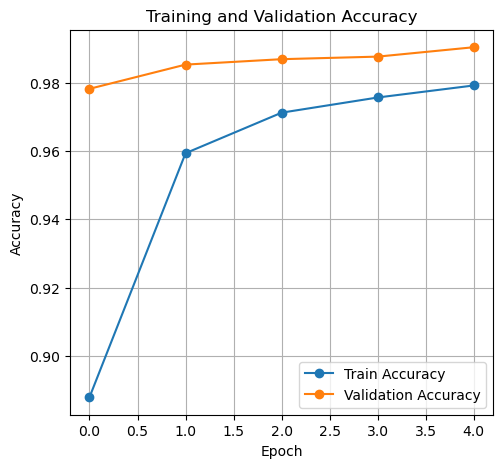

In [9]:
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.grid(True) 

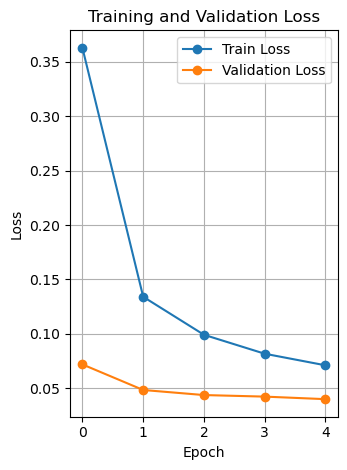

In [10]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss', marker='o') 
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [11]:
predictions = model.predict(test_images) 
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [12]:
num_samples = 10 
plt.figure(figsize=(15, 4)) 


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

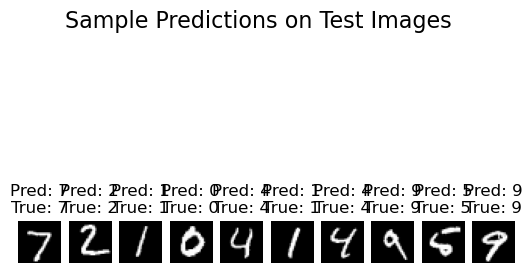

In [14]:
for i in range(num_samples): 
    plt.subplot(1, num_samples, i + 1) 
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}") 
    plt.axis('off') 

plt.suptitle("Sample Predictions on Test Images", fontsize=16) 
plt.show()
 